In [ ]:

# Document Author: Dr. Vishal Sharma
# Author email: sharma_vishal14@hotmail.com
# License: MIT
# This tutorial is applicable for NAnPack version 1.0.0-alpha4 

# Tutorial 3: Solving a 1D diffusion equation using all methods

### I. Objectives

The objectives of this tutorial are two-fold:
Firstly, inform users about the various available numerical methods for solving 1D diffusion equation and comparing the numerical solutions obtained from those methods, and
Secondly, creating an automation script- that can run simulations using all available numerical method for 1D diffusion model so as to reduce user efforts that will go into writing multiple scripts. This automation example can be used as a reference for creating other automation scripts.

### II. Case Description

We will use the same example which was presented in [Tutorial 2](./tutorial-02-diffusion-1D-solvers-FTCS.ipynb).

### III. Numerical Methods

1. **Forward Time Central Spacing (FTCS) method**

Brief description of this method is given in [Tutorial 2](./tutorial-02-diffusion-1D-solvers-FTCS.ipynb).  

Function call:  
    
    nanpack.parabolicsolvers.FTCS(Uo, diffX, diffY)  

2. **DuFort-Frankel method**

This is an explicit method in which the time and space derivatives are discretized by second-order central differencing which is the same as in Richardson method, however, to make the scheme stable, the term $u_{i}^n$ in the diffusion term is approximated by averaging over two time steps such that

$$u_{i}^n = \frac{u_{i}^{n+1}+u_{i}^{n-1}}{2}$$

Such modification makes the scheme unconditionally stable. After some modifications, the discretized equation is expressed as

$$[1+2d_x]u_{i}^{n+1} = [1-2d_x]u_{i}^{n-1} + 2d_x[u_{i+1}^{n}+u_{i-1}^{n}]$$

where $$d_x=\frac{\nu(\Delta t)}{(\Delta x)^2}$$

As observed in the equation, values of the dependent variable at two time steps *n* and (*n*-1) is required, hence the storage requirements are increased. Also, the accuracy of the DuFort Frankel depends on the starter solution which depends on two sets of initial conditions. This method is second-order accurate in both space and time.

Function call:

    nanpack.parabolicsolvers.DuFortFrankel(Uo, Uold2, diffX, diffY)

3. **Laasonen method**

This is an implicit formulation which is expressed as

$$Au_{i+1}^{n+1}+Bu_{i}^{n+1}+Cu_{i-1}^{n+1}=D$$

where,
$$A = -d_{x}$$
$$B = 1+2d_{x}$$
$$C = -d_{x}$$
$$D = u_{i}^{n}$$
$$d_x=\frac{\nu(\Delta t)}{(\Delta x)^2}$$

The implicit schemes are unconditionally stable and therefore a larger time step can be used to minimize the simulation steps. The time step is, however, restricted due to other numerical errors such as truncation error. 

The discretized equation results in the set of linear algebraic equations. Subsequently, the algebraic equations are written in the matrix form that consists of a tridiagonal coefficient matrix. This formulation leads to larger computational time which can be somewhat compensated by using a larger time step.

Function call:

    nanpack.parabolicsolvers.Laasonen(Uo, diffX) 

4. **Crank-Nicolson method**

The Crank-Nicolson is also an implicit formulation in which the diffusion term is approximated by averaging the central difference at time levels *n* and *n*+1. The discretized equation is expressed as:

$$Au_{i+1}^{n+1}+Bu_{i}^{n+1}+Cu_{i-1}^{n+1}=D$$

where,
$$A = -\frac{1}{2}d_{x}$$
$$B = 1+d_{x}$$
$$C = -\frac{1}{2}d_{x}$$
$$D = \frac{1}{2}d_{x}u_{i+1}^{n}+(1-d_{x})u_{i}^{n}+\frac{1}{2}d_{x}u_{i-1}^{n}$$
$$d_x=\frac{\nu(\Delta t)}{(\Delta x)^2}$$

The Crank-Nicolson method is second-order accurate in both space and time.  

Function call: 

    nanpack.parabolicsolvers.CrankNicolson(Uo, diffX)  

-----
**Important**: It is to be noted that both Laasonen and Crank-Nicolson methods are inefficient for 2D applications because the coefficient matrix is pentadiagonal, the solution of which is very time-consuming.
-----

-----
**Additional resources**  
1. Link to my [blogs](https://www.linkedin.com/in/vishalsharmaofficial/detail/recent-activity/posts/).  
2. Computational Fluid Dynamics, Vol. 1 by Dr. Klaus Hoffmann- This book is very clear and informative.
-----

### IV. Script Development

*This code script is provided in file* `./examples/tutorial-03-diffusion-1D-solvers-all.py`

Most of the script remains the same as in [Tutorial 2](./tutorial-02-diffusion-1D-solvers-FTCS.ipynb) and therefore explanation is only provided on how you can automate to run all numerical methods in a single program without the need to write the same code multiple times.

In [2]:
# Import modules
import nanpack.preprocess as pre
from nanpack.grid import RectangularGrid
import nanpack.parabolicsolvers as pb
import nanpack.postprocess as post
from nanpack.benchmark import ParallelPlateFlow

cfg = pre.RunConfig("path/to/project/input/config.ini")

X, _ = RectangularGrid(cfg.dX, cfg.iMax)
diffX,_ = pre.DiffusionNumbers(cfg.Dimension, cfg.diff, cfg.dT, cfg.dX)

*******************************************************
*******************************************************
Starting configuration.

Searching for simulation configuration file in path:
"D:/MyProjects/projectroot/nanpack/input/config.ini"
SUCCESS: Configuration file parsing.
Checking whether all sections are included in config file.
Checking section SETUP: Completed.
Checking section DOMAIN: Completed.
Checking section MESH: Completed.
Checking section IC: Completed.
Checking section BC: Completed.
Checking section CONST: Completed.
Checking section STOP: Completed.
Checking section OUTPUT: Completed.
Checking numerical setup.
User inputs in SETUP section check: Completed.
Accessing domain geometry configuration: Completed
Accessing meshing configuration: Completed.
Calculating grid size: Completed.
Assigning COLD-START initial conditions to the dependent term.
Initialization: Completed.
Accessing boundary condition settings: Completed
Accessing constant data: Completed.
Calculatin

Create a list `func` that contains the reference to the the numerical methods. Also, since in our configuration file we can provide only one file name as the input that will lead to overwriting of results in that one file, we have to provide 4 file names to the program to save the results from different numerical methods in their respective files. Let's create a list `files` as shown in code cell 3.

In [3]:
func = [pb.FTCS, pb.DuFortFrankel, pb.Laasonen, pb.CrankNicolson]
files = ["FTCS", "DuFortFrankel", "Laasonen", "CrankNicolson"]

Write a `for` loop to iterate over the functions provided in the list `func`. In this way, one numerical solution is obtained using one method at the required time step and after completion, the next numerical method will be executed and so on, until all the numerical methods in `func` list have been executed.

Since DuFort-Frankel method requires two sets of initial solution, one of which will be obtained using the FTCS method as can be seen in the codes. The accurcy of the DuFort-Frankel method depends on this starter solution and often this starter solution is provided by the analytical solution, if available.

In [4]:
# Start a loop for 4 solver functions
for f in range(len(func)):
    # Define initial conditions
    cfg.U[0] = 40.0
    cfg.U[1:] = 0.0
    # Define boundary conditions
    U = BC(cfg.U)
    # Start iterations
    Error = 1.0
    n = 0

    while n <= cfg.nMax and Error > cfg.ConvCrit:
        Error = 0.0
        n += 1
        # DuFort Frankel will be executed in this block
        if f == 1:
            if n == 1: # at first-time step, obtain starter solutions
                Uold = U.copy() # initial condition for n= -1 time level
                U = pb.FTCS(Uold, diffX) # FTCS solution for n=0 time level  
            Uold2 = Uold.copy() # Store solution at (n-1)th time step
            Uold = U.copy() # Store solution at (n)th time step
            U = func[f](Uold, Uold2, diffX)
        # All other numerical methods will be executed in this block
        else: 
            Uold = U.copy()
            U = func[f](Uold, diffX)
        Error = post.AbsoluteError(U, Uold)
        # Update BC
        U = BC(U)
        # Write output to file
        # Provide a complete path where the files will be stored
        fname = f"path/to/project/output/{files[f]}1D.dat"
        convfname = f"path/to/project/output/hist{files[f]}1D.dat"
        post.WriteSolutionToFile(U, n, cfg.nWrite, cfg.nMax, fname, cfg.dX)
        # Write convergence history log to a file
        post.WriteConvHistToFile(cfg, n, Error, convfname)

    # Write output to file
    post.WriteSolutionToFile(U, n, cfg.nWrite, cfg.nMax, fname, cfg.dX)
    # Write convergence history log to a file
    post.WriteConvHistToFile(cfg, n, Error, convfname)
    print()


STATUS: SOLUTION OBTAINED AT
TIME LEVEL= 1.08 s.
TIME STEPS= 468

Writing convergence log file: Completed.
Files saved:
"D:/MyProjects/projectroot/nanpack/output/histFTCS1D.dat".


STATUS: SOLUTION OBTAINED AT
TIME LEVEL= 1.08 s.
TIME STEPS= 468

Writing convergence log file: Completed.
Files saved:
"D:/MyProjects/projectroot/nanpack/output/histDuFortFrankel1D.dat".


STATUS: SOLUTION OBTAINED AT
TIME LEVEL= 1.08 s.
TIME STEPS= 468

Writing convergence log file: Completed.
Files saved:
"D:/MyProjects/projectroot/nanpack/output/histLaasonen1D.dat".


STATUS: SOLUTION OBTAINED AT
TIME LEVEL= 1.08 s.
TIME STEPS= 468

Writing convergence log file: Completed.
Files saved:
"D:/MyProjects/projectroot/nanpack/output/histCrankNicolson1D.dat".



In [5]:
# Obtain analytical solution
Uana = ParallelPlateFlow(40.0, X, cfg.diff, cfg.totTime, 20)
post.WriteSolutionToFile(Uana, 10, cfg.nWrite, cfg.nMax,
                         "path/to/project/output/analytical1D.dat",
                         cfg.dX)

Plot the results using the `Plot1DResults` function included in the package. Use `help(Plot1DResults)` command to see the allowed input arguments. 

Preparing data to plot results...
Plotting 1D results


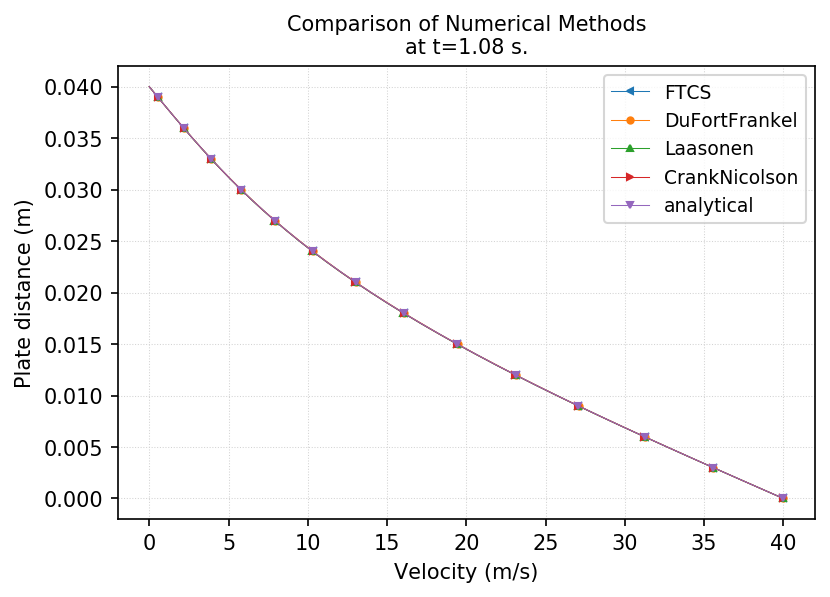

In [6]:
fn = [] # empty list to store full path to the files
files.append("analytical") # add another file name to the files list
for f in range(len(files)): # add complete path to files from which the plotting function will read data to plot
    fn.append(f"path/to/project/output/{files[f]}1D.dat")
# Call the plotting function and provide arguments to customize plot
post.Plot1DResults(dataFiles=fn, uAxis="X", Markers="default", Legend=files,\
                   Title=f"Comparison of Numerical Methods\nat t={cfg.totTime} s.",
                  xLabel="Velocity (m/s)", yLabel="Plate distance (m)")

In [1]:
def BC(U):
    """Return the dependent variable with the updated values at the boundaries."""
    U[0] = 40.0
    U[-1] = 0.0

    return U

Congratulation, you have created a script to run all the available numerical solvers for 1D diffusion model and compared the numerical results using plotting tools.